In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TG_STAID004563.txt', delimiter=",", skiprows=19) 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25568 entries, 0 to 25567
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    25568 non-null  int64
 1       DATE  25568 non-null  int64
 2      TG     25568 non-null  int64
 3    Q_TG     25568 non-null  int64
dtypes: int64(4)
memory usage: 799.1 KB


In [4]:
df

,SOUID,DATE,TG,Q_TG
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0
...,...,...,...,...
25563,121152,20201227,17,0
25564,121152,20201228,30,0
25565,121152,20201229,23,0
25566,121152,20201230,24,0


In [5]:
df.columns = ['id', 'date', 'temp', 'quality']

In [6]:
df

,id,date,temp,quality
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0
...,...,...,...,...
25563,121152,20201227,17,0
25564,121152,20201228,30,0
25565,121152,20201229,23,0
25566,121152,20201230,24,0


In [7]:
df['id'].nunique()

3

In [8]:
df['id'].value_counts()

121152    20454
127848     3287
111448     1827
Name: id, dtype: int64

In [9]:
df['id'] = df['id'].where(df['id']==121152)

In [10]:
df['quality'].value_counts()

0    25568
Name: quality, dtype: int64

In [11]:
df = df.dropna(axis=0)

In [12]:
df = df.drop(labels=['id','quality'], axis=1)

In [13]:
df

,date,temp
5114,19650101,49
5115,19650102,28
5116,19650103,14
5117,19650104,-9
5118,19650105,24
...,...,...
25563,20201227,17
25564,20201228,30
25565,20201229,23
25566,20201230,24


In [14]:
df = df.reset_index()

In [15]:
df = df.drop(labels=['index'], axis=1)

In [16]:
df

,date,temp
0,19650101,49
1,19650102,28
2,19650103,14
3,19650104,-9
4,19650105,24
...,...,...
20449,20201227,17
20450,20201228,30
20451,20201229,23
20452,20201230,24


In [17]:
# temp before = temp missing date

In [18]:
df['date'] = df['date'].astype(str)
df['date'] = pd.to_datetime(df['date'])

In [19]:
df = df.set_index('date')

In [20]:
df

,temp
date,
1965-01-01,49
1965-01-02,28
1965-01-03,14
1965-01-04,-9
1965-01-05,24
...,...
2020-12-27,17
2020-12-28,30
2020-12-29,23


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20454 entries, 1965-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   temp    20454 non-null  int64
dtypes: int64(1)
memory usage: 319.6 KB


<AxesSubplot:ylabel='date'>

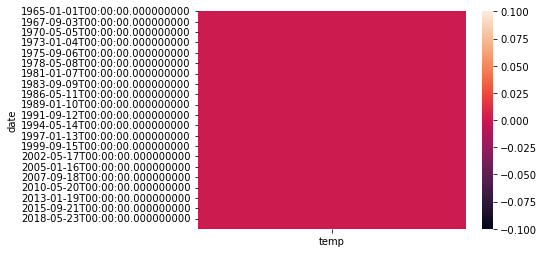

In [22]:
sns.heatmap(df.isnull())

In [23]:
# exp(why data as index is good): df_subset = df.loc['1980':'1988']

In [24]:
df['temp'] = df['temp']*0.1

<AxesSubplot:xlabel='date'>

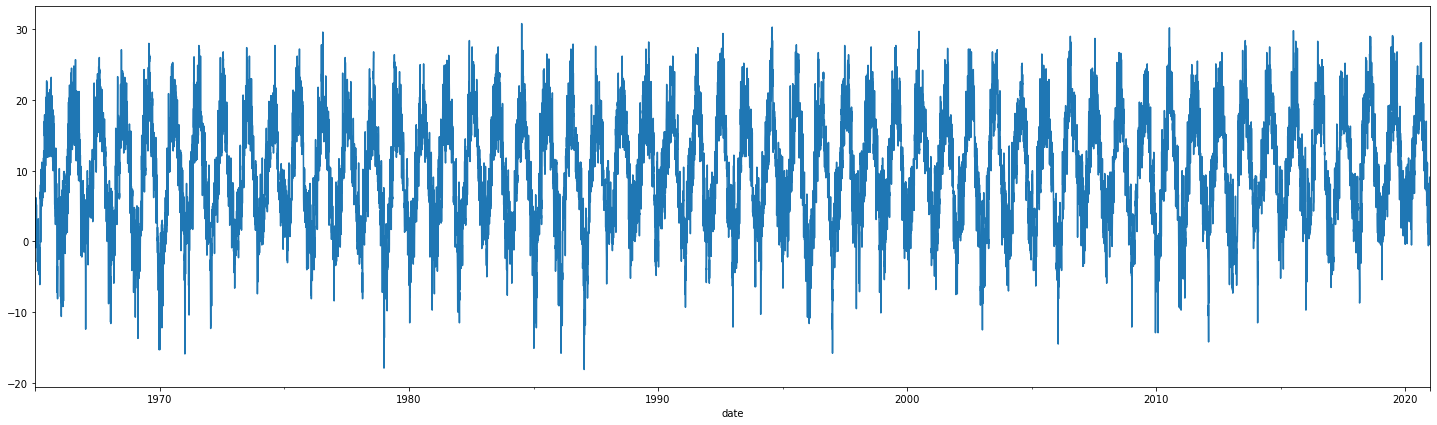

In [25]:
plt.figure(figsize=(25,7))

df['temp'].plot()

In [26]:
df

,temp
date,
1965-01-01,4.9
1965-01-02,2.8
1965-01-03,1.4
1965-01-04,-0.9
1965-01-05,2.4
...,...
2020-12-27,1.7
2020-12-28,3.0
2020-12-29,2.3


In [27]:
max(df['temp']), min(df['temp'])

(30.8, -18.1)

In [28]:
df_train = df.loc[:'2019']

In [29]:
df_test = df.loc['2020']

In [30]:
df_train.to_csv('df_train.csv')

In [31]:
df_test.to_csv('df_test.csv')